In [1]:
using TensorNetworkQuantumSimulator
const TN = TensorNetworkQuantumSimulator

using ITensorNetworks

using NamedGraphs.NamedGraphGenerators: named_grid

[ Info: Precompiling TensorNetworkQuantumSimulator [4de3b72a-362e-43dd-83ff-3f381eda9f9c] (cache misses: include_dependency fsize change (2))
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing TensorNetworkQuantumSimulator [4de3b72a-362e-43dd-83ff-3f381eda9f9c].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [2]:
nx = 5
ny = 5
nq = nx * ny

# the graph is your main friend in working with the TNs
g = named_grid((nx, ny))

NamedGraphs.NamedGraph{Tuple{Int64, Int64}} with 25 vertices:
25-element NamedGraphs.OrderedDictionaries.OrderedIndices{Tuple{Int64, Int64}}:
 (1, 1)
 (2, 1)
 (3, 1)
 (4, 1)
 (5, 1)
 (1, 2)
 (2, 2)
 (3, 2)
 (4, 2)
 (5, 2)
 (1, 3)
 (2, 3)
 (3, 3)
 (4, 3)
 (5, 3)
 (1, 4)
 (2, 4)
 (3, 4)
 (4, 4)
 (5, 4)
 (1, 5)
 (2, 5)
 (3, 5)
 (4, 5)
 (5, 5)

and 40 edge(s):
(1, 1) => (2, 1)
(1, 1) => (1, 2)
(2, 1) => (3, 1)
(2, 1) => (2, 2)
(3, 1) => (4, 1)
(3, 1) => (3, 2)
(4, 1) => (5, 1)
(4, 1) => (4, 2)
(5, 1) => (5, 2)
(1, 2) => (2, 2)
(1, 2) => (1, 3)
(2, 2) => (3, 2)
(2, 2) => (2, 3)
(3, 2) => (4, 2)
(3, 2) => (3, 3)
(4, 2) => (5, 2)
(4, 2) => (4, 3)
(5, 2) => (5, 3)
(1, 3) => (2, 3)
(1, 3) => (1, 4)
(2, 3) => (3, 3)
(2, 3) => (2, 4)
(3, 3) => (4, 3)
(3, 3) => (3, 4)
(4, 3) => (5, 3)
(4, 3) => (4, 4)
(5, 3) => (5, 4)
(1, 4) => (2, 4)
(1, 4) => (1, 5)
(2, 4) => (3, 4)
(2, 4) => (2, 5)
(3, 4) => (4, 4)
(3, 4) => (3, 5)
(4, 4) => (5, 4)
(4, 4) => (4, 5)
(5, 4) => (5, 5)
(1, 5) => (2, 5)
(2, 5) => (3

In [3]:
dt = 0.05

hx = 1.0
hz = 0.8
J = 0.5

# pauli rotations are tuples like `(pauli_string, [site_labels], parameter)`
layer = []
append!(layer, ("X", [v], 2*hx*dt) for v in TN.vertices(g))
append!(layer, ("Z", [v], 2*hz*dt) for v in TN.vertices(g))
append!(layer, ("ZZ", pair, 2*J*dt) for pair in TN.graphtotopology(g));

In [4]:
# observables are tuples like `(pauli_string, [site_labels], optional:coefficient)`
# it's important that the `site_labels` match the names of the vertices of the graph `g`
obs = ("Z", [(3, 3)])  # right in the middle

("Z", [(3, 3)])

In [5]:
# the number of circuit layers
nl = 50

50

In [6]:
# the initial state
ψ = TN.zerostate(g)

# an array to keep track of expectations
expectations = Float64[real(TN.expect(ψ, obs))]

# evolve! The first evaluation will take significantly longer because of compulation.
for l in 1:nl
    #printing
    println("Layer $l")

    # apply layer
    t = @timed ψ = TN.apply(layer, ψ);

    # push expectation to list
    push!(expectations, real(TN.expect(ψ, obs)))

    # printing
    println("    Took time: $(t.time) [s]. Max bond dimension: $(ITensorNetworks.maxlinkdim(ψ))")
end

Layer 1
    Took time: 66.56913894 [s]. Max bond dimension: 2
Layer 2
    Took time: 0.689563687 [s]. Max bond dimension: 2
Layer 3
    Took time: 0.625228818 [s]. Max bond dimension: 2
Layer 4
    Took time: 0.633324914 [s]. Max bond dimension: 2
Layer 5
    Took time: 0.61374681 [s]. Max bond dimension: 2
Layer 6
    Took time: 0.606969536 [s]. Max bond dimension: 2
Layer 7
    Took time: 0.605310023 [s]. Max bond dimension: 2
Layer 8
    Took time: 0.632045249 [s]. Max bond dimension: 3
Layer 9
    Took time: 0.633098475 [s]. Max bond dimension: 3
Layer 10
    Took time: 0.620759024 [s]. Max bond dimension: 3
Layer 11
    Took time: 0.618934407 [s]. Max bond dimension: 3
Layer 12
    Took time: 0.647949882 [s]. Max bond dimension: 4
Layer 13
    Took time: 0.682247469 [s]. Max bond dimension: 4
Layer 14
    Took time: 0.701739751 [s]. Max bond dimension: 4
Layer 15
    Took time: 0.673529751 [s]. Max bond dimension: 4
Layer 16
    Took time: 0.66922955 [s]. Max bond dimension: 4
Lay

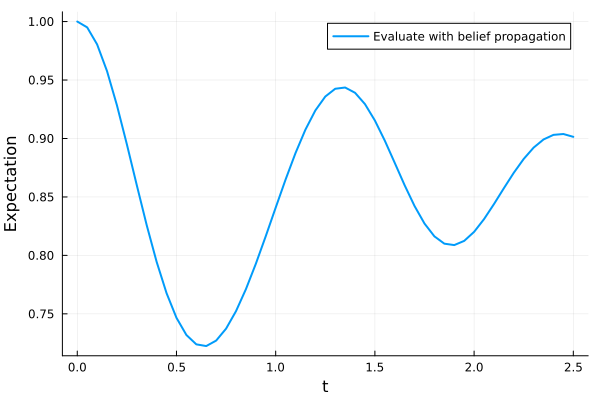

In [7]:
using Plots
plot((0:nl) .* dt, expectations, xlabel="t", ylabel="Expectation", lw=2, label="Evaluate with belief propagation")

In [8]:
## A few more advanced options
# we will still do exactly the same evolution but also do loop correction for expectation values

In [9]:
# max bond dimension for the TN
# we will use enough and just see how
apply_kwargs = (maxdim=20, cutoff=1e-10, normalize=false)

# BP cache parameters
bp_update_kwargs =(maxiter=20, tol=1e-6, message_update=ms -> TN.make_eigs_real.(TN.default_message_update(ms)))

(maxiter = 20, tol = 1.0e-6, message_update = var"#7#8"())

In [12]:
# the initial state
ψ = TN.zerostate(g)

# create the BP cache manually
ψψ = TN.build_bp_cache(ψ; bp_update_kwargs...)

# an array to keep track of expectations
expectations_advanced = Float64[real(TN.expect(ψ, obs))]

# evolve! The first evaluation will take significantly longer because of compulation.
for l in 1:nl
    println("Layer $l")

    # pass BP cache manually
    # only update cache every `update_every` overlapping 2-qubit gates
    t1 = @timed ψ, ψψ = TN.apply(layer, ψ, ψψ; apply_kwargs, update_every=1, verbose=false);
    
    ## could also update outside 
    # t2 = @timed ψψ = TN.update(ψψ; bp_update_kwargs...)

    # push expectation to list
    # pass the cache instead of the state so that things don't have to update over and over
    push!(expectations_advanced, real(TN.expect(ψψ, obs; max_loop_size=4)))  # with some loop correction

    
    println("    Took time: $(t1.time) [s]. Max bond dimension: $(ITensorNetworks.maxlinkdim(ψ))")
end

Layer 1
    Took time: 0.506245219 [s]. Max bond dimension: 2
Layer 2
    Took time: 0.528717309 [s]. Max bond dimension: 2
Layer 3
    Took time: 0.535730155 [s]. Max bond dimension: 2
Layer 4
    Took time: 0.528729482 [s]. Max bond dimension: 2
Layer 5
    Took time: 0.522494728 [s]. Max bond dimension: 2
Layer 6
    Took time: 0.526133353 [s]. Max bond dimension: 2
Layer 7
    Took time: 0.523259448 [s]. Max bond dimension: 2
Layer 8
    Took time: 0.537571285 [s]. Max bond dimension: 3
Layer 9
    Took time: 0.547607777 [s]. Max bond dimension: 3
Layer 10
    Took time: 0.544215587 [s]. Max bond dimension: 3
Layer 11
    Took time: 0.548733204 [s]. Max bond dimension: 3
Layer 12
    Took time: 0.565436777 [s]. Max bond dimension: 4
Layer 13
    Took time: 0.584758937 [s]. Max bond dimension: 4
Layer 14
    Took time: 0.58052644 [s]. Max bond dimension: 4
Layer 15
    Took time: 0.587263154 [s]. Max bond dimension: 4
Layer 16
    Took time: 0.584302405 [s]. Max bond dimension: 4
La

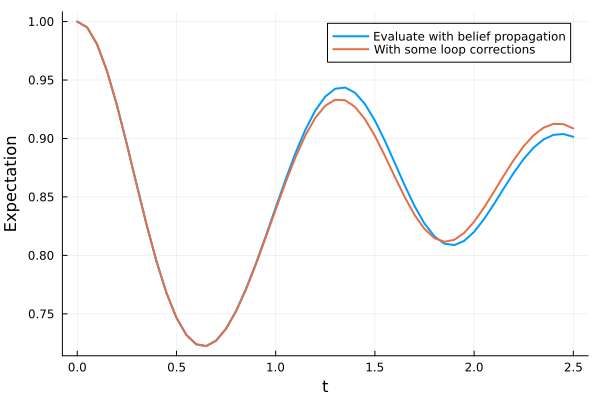

In [13]:
plot((0:nl) .* dt, expectations, xlabel="t", ylabel="Expectation", lw=2, label="Evaluate with belief propagation")
plot!((0:nl) .* dt, expectations_advanced, lw=2, label="With some loop corrections")